In [1]:
import numpy as np
import pandas as pd
import matplotlib
from scipy import stats, integrate
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline
import seaborn.apionly as sns

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load Data

In [2]:
df = pd.read_csv('playlists_categories_plus_audio_artists_metagenres.csv', encoding='ISO-8859-1')
df["average_duration_min"] = df["average_duration_ms"] * 1.66667e-5
df["total_duration_min"] = df["total_duration"] * 1.66667e-5
df
df

,playlist_name,playlist_id,followers,average_danceability,average_energy,average_key,average_loudness,average_mode,average_speechiness,average_acousticness,...,average_tempo,average_time_signature,average_duration_ms,total_duration,total_num,genre,max_popularity,avg_popularity,average_duration_min,total_duration_min
0,Today's Top Hits,37i9dQZF1DXcBWIGoYBM5M,18098330,0.671280,0.655880,4.980000,-5.443000,0.600000,0.082964,0.197658,...,122.747080,3.980000,208131.2200,10406561,50,pop,97,80.240000,3.468861,173.443030
1,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,8295257,0.752765,0.622176,5.568627,-6.668294,0.549020,0.234988,0.178904,...,129.420941,4.039216,211914.7647,10807653,51,rap,96,73.588235,3.531920,180.127910
2,mint,37i9dQZF1DX4dyzvuaRJ0n,4595392,0.649760,0.775480,4.460000,-5.624800,0.500000,0.072348,0.116406,...,125.649840,3.960000,211429.6400,10571482,50,electronic,89,59.000000,3.523834,176.191719
3,Are & Be,37i9dQZF1DX4SBhb3fqCJd,3777270,0.627640,0.538420,5.280000,-7.312480,0.520000,0.129162,0.223716,...,117.075600,3.980000,224363.6000,11218180,50,pop,87,64.080000,3.739401,186.970041
4,Rock This,37i9dQZF1DXcF6B6QPhFDv,3992066,0.526160,0.787100,5.000000,-5.252220,0.560000,0.064722,0.050970,...,126.461040,3.900000,220319.1800,11015959,50,rock,74,60.260000,3.671994,183.599684
5,Hot Country,37i9dQZF1DX1lVhptIYRda,4244887,0.586333,0.718255,6.058824,-5.756765,0.901961,0.043808,0.159697,...,118.366275,3.980392,195283.8039,9959474,51,country,90,66.764706,3.254737,165.991565
6,åÁViva Latino!,37i9dQZF1DX10zKzsJ2jva,6607264,0.729380,0.768520,4.980000,-4.832860,0.620000,0.088064,0.165950,...,119.758800,4.000000,217256.6400,10862832,50,world,91,79.480000,3.620951,181.047562
7,Afternoon Acoustic,37i9dQZF1DX4E3UdUs7fUx,2470127,0.525704,0.325552,5.370370,-11.725062,0.777778,0.033222,0.786123,...,114.429407,3.913580,228501.9506,18508658,81,indie,75,51.246914,3.808373,308.478250
8,Peaceful Piano,37i9dQZF1DX4sWSpwq3LiO,3313734,0.232568,0.041348,3.006173,-15.045525,0.277778,0.028737,0.609469,...,66.667210,2.191358,109436.0926,17728647,162,ambient,74,36.759259,1.823939,295.478041
9,Roots Rising,37i9dQZF1DWYV7OOaGhoH0,987430,0.491962,0.427081,5.238095,-9.009171,0.685714,0.035198,0.533639,...,109.990086,3.676190,221428.0000,23249940,105,indie,77,48.228571,3.690474,387.499775


#### The next two visualizations shows the frequency and distribution of playlist durations and song durations in our dataset. This is useful to know before making any decisions on how we might want to manipulate the data because we can see how it is skewed and get a better sense of common trends.

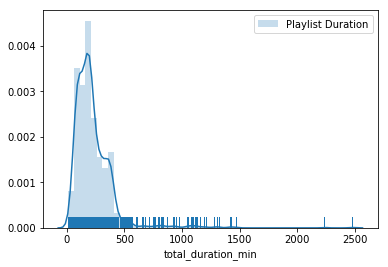

In [3]:
#distribution of the total duration of playlists (milliseconds)
#sns.set(color_codes=True)
sns.distplot(df["total_duration_min"],rug=True, hist_kws = {'alpha': 0.25, 'label': 'Playlist Duration'});
plt.legend();

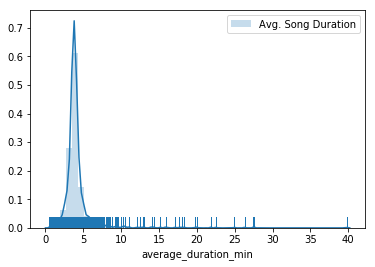

In [4]:
#distribution of the avg. duration of songs (milliseconds) 
sns.distplot(df["average_duration_min"],rug=True, hist_kws = {'alpha': 0.25, 'label': 'Avg. Song Duration'});
plt.legend();

#### There are significant outliers in the dataset that we need to be aware of for the number of end followers; followers does not follow a normal distribution in the dataset, and instead it is skewed with a right tail. What can hardly be seen here is that there are just a few outliers out to the right. We will need to decide whether to include these outliers or not in the data we eventually use.


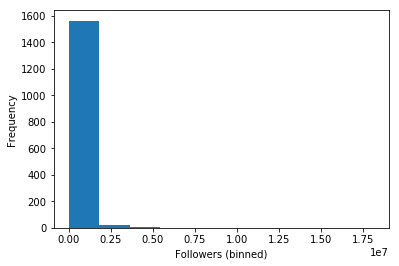

In [5]:
plt.hist(df["followers"])
plt.ylabel("Frequency")
plt.xlabel("Followers (binned)");

#### All average audio information variables (seen in the visualizations below) appear to have meaningful relationships with the response variable; some more than others, but some are linear and some (such as mode) appear to be curved. 

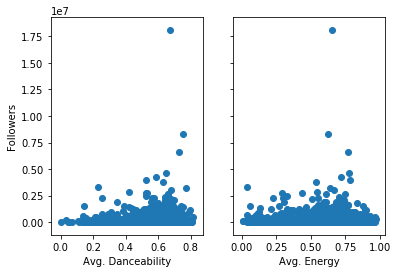

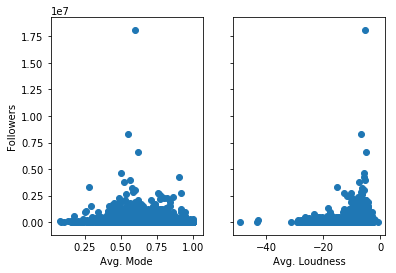

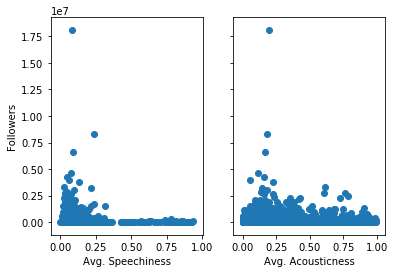

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df["average_danceability"], df["followers"])
ax1.set_ylabel('Followers')
ax1.set_xlabel('Avg. Danceability')
ax2.scatter(df["average_energy"], df["followers"])
ax2.set_xlabel('Avg. Energy')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df["average_mode"], df["followers"])
ax1.set_ylabel('Followers')
ax1.set_xlabel('Avg. Mode')
ax2.scatter(df["average_loudness"], df["followers"])
ax2.set_xlabel('Avg. Loudness')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df["average_speechiness"], df["followers"])
ax1.set_ylabel('Followers')
ax1.set_xlabel('Avg. Speechiness')
ax2.scatter(df["average_acousticness"], df["followers"])
ax2.set_xlabel('Avg. Acousticness')



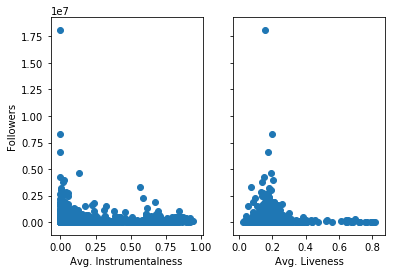

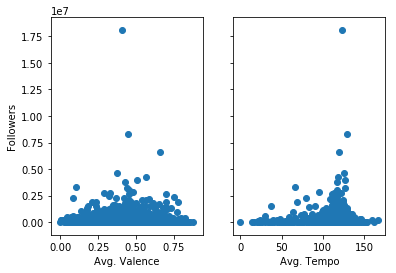

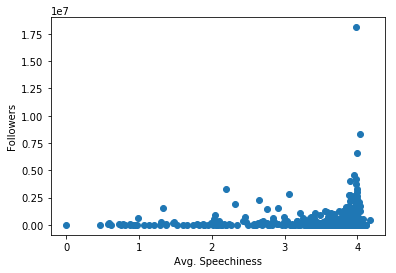

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df["average_instrumentalness"], df["followers"])
ax1.set_ylabel('Followers')
ax1.set_xlabel('Avg. Instrumentalness')
ax2.scatter(df["average_liveness"], df["followers"])
ax2.set_xlabel('Avg. Liveness')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df["average_valence"], df["followers"])
ax1.set_ylabel('Followers')
ax1.set_xlabel('Avg. Valence')
ax2.scatter(df["average_tempo"], df["followers"])
ax2.set_xlabel('Avg. Tempo')

f, (ax1) = plt.subplots(1, 1, sharey=True)
ax1.scatter(df["average_time_signature"], df["followers"])
ax1.set_ylabel('Followers')
ax1.set_xlabel('Avg. Speechiness')


#### From the below visualizationa it appears that average song duration and total playlist duration are both highly significant variables. Both appear to have optimal values peaking at smaller numbers, rather than a strictly linear relationship. Therefore we will likely attempt modeling these terms quadratically in some way.


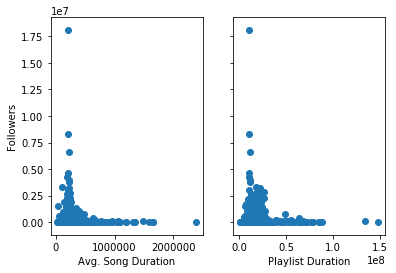

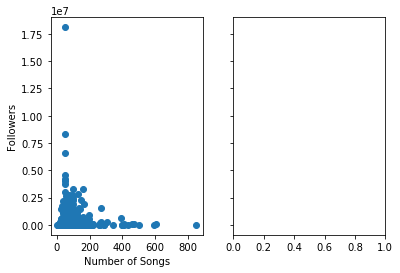

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df["average_duration_ms"], df["followers"])
ax1.set_ylabel('Followers')
ax1.set_xlabel('Avg. Song Duration')
ax2.scatter(df["total_duration"], df["followers"])
ax2.set_xlabel('Playlist Duration')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(df["total_num"], df["followers"])
ax1.set_ylabel('Followers')
ax1.set_xlabel('Number of Songs')

#### A quick test for colinearity provides us with good information about the information that our predictors encode not just individually, but as an overall dataset. We wanted to look at these relationships as we will need to be aware of what predictors are the most powerful and which can be encapsulated by another variable. 

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


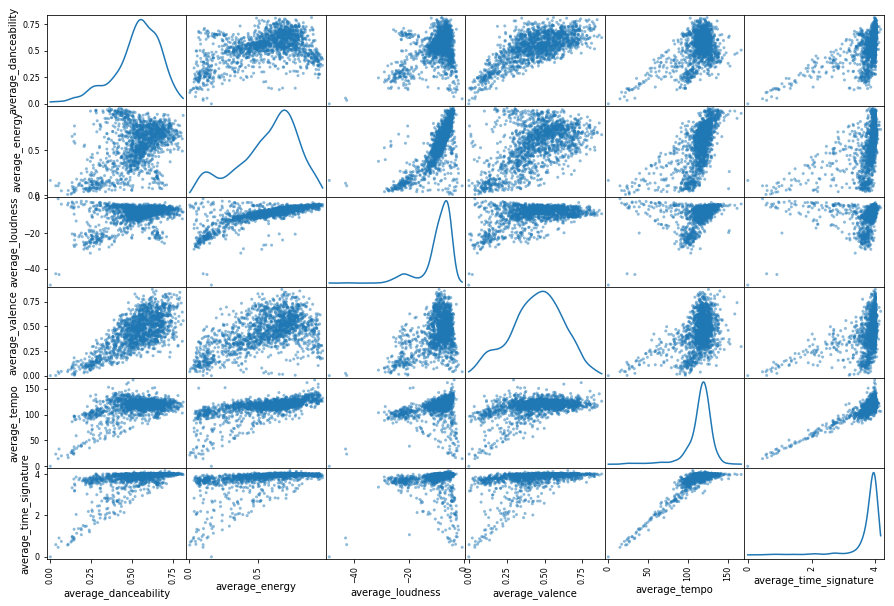

In [9]:
from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(1,1, figsize=(15,10))
axes = scatter_matrix(df[["average_danceability","average_energy","average_loudness","average_valence",
                          "average_tempo","average_time_signature"]], alpha=0.5, diagonal='kde', ax=ax)
plt.show()

#### Since we will be trying to create an optimal playlist queried by genre, we decided to catgorize our playlists into 23 genres that described the artists on the tracks included in the playlist. Spotify API did not assign genres to actual playlists so we imputed them through the artist and generalized so that we would have a significant amount of playlists in each genre.

In [10]:
genre_info = ['average_danceability','average_energy','average_key','average_loudness',
              'average_mode','average_speechiness','average_acousticness','average_instrumentalness',
              'average_liveness','average_valence','average_tempo','average_time_signature',
              'average_duration_ms','total_duration','max_popularity','avg_popularity','average_duration_min',
              'total_duration_min']
df_cats_minus_audio = df.drop(genre_info, axis=1)
df_cats_minus_audio

,playlist_name,playlist_id,followers,total_num,genre
0,Today's Top Hits,37i9dQZF1DXcBWIGoYBM5M,18098330,50,pop
1,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,8295257,51,rap
2,mint,37i9dQZF1DX4dyzvuaRJ0n,4595392,50,electronic
3,Are & Be,37i9dQZF1DX4SBhb3fqCJd,3777270,50,pop
4,Rock This,37i9dQZF1DXcF6B6QPhFDv,3992066,50,rock
5,Hot Country,37i9dQZF1DX1lVhptIYRda,4244887,51,country
6,åÁViva Latino!,37i9dQZF1DX10zKzsJ2jva,6607264,50,world
7,Afternoon Acoustic,37i9dQZF1DX4E3UdUs7fUx,2470127,81,indie
8,Peaceful Piano,37i9dQZF1DX4sWSpwq3LiO,3313734,162,ambient
9,Roots Rising,37i9dQZF1DWYV7OOaGhoH0,987430,105,indie


#### The below visualization demonstrates that there are significant differences in the mean number of followers between playlists of different genres. Therefore we will likely sacrifice the benefits of a larger dataset for the usefulness of the added genre information in the smaller dataset. Some genres do not have enough playlists in them, e.g. Comedy has only 2 playlists. We will likely have to cull this category from the dataset. In addition, we may wish to model ‘speech-y’ categories such literature and discussion differently from musical playlists, since their length is longer and they are generally less popular.


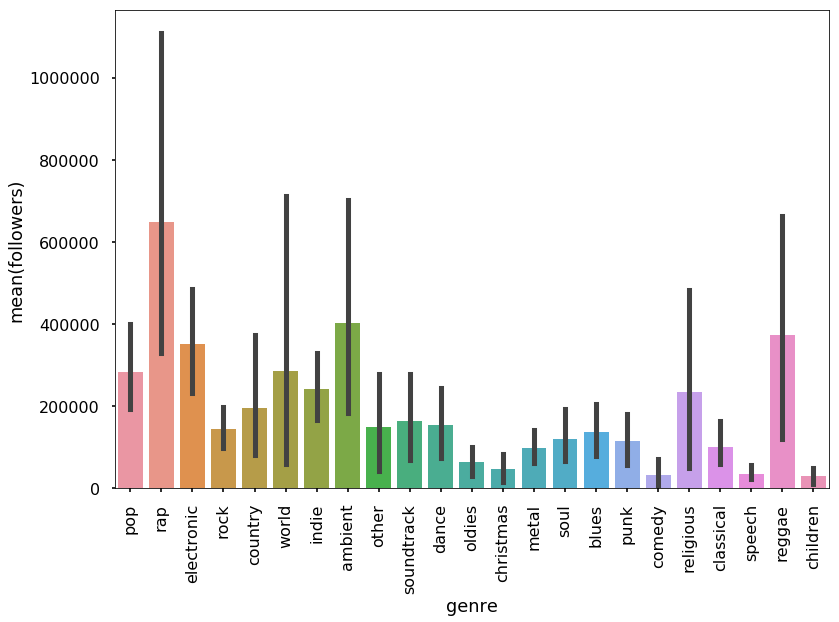

In [11]:
# bar chart of categories versus followers
# drop the None genre
df_cats_minus_audio = df_cats_minus_audio.drop(df_cats_minus_audio[df_cats_minus_audio.genre == "None"].index)
g_object = df_cats_minus_audio.groupby("genre").mean()
sns.set_context("poster")
g = sns.barplot(x='genre', y='followers', data=df_cats_minus_audio)
plt.xticks(rotation=90);